In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def load_azimuth_data(actuator, data_path, base_time=None):
    file_path = f"{data_path}/actuators/actuator_{actuator}/azimuth_angle.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time

def load_rpm_data(actuator, data_path, base_time=None):
    file_path = f"{data_path}/actuators/actuator_{actuator}/thruster/motor_state.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time

def load_actuator_ref(actuator, data_path, base_time):
    file_path = f"{data_path}/actuator_ref_{actuator}.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec

def load_tau_diff_data(data_path, base_time=None):
    file_path = f"{data_path}/tau_diff.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time


def load_control_action_data(data_path, base_time=None):
    file_path = f"{data_path}/dynamic_positioning/control_action.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time

def load_desired_control_action_data(data_path, base_time=None):
    file_path = f"{data_path}/tau_actual.csv"
    data = pd.read_csv(file_path)
    time = pd.to_datetime(data['time'])
    if base_time is None:
        base_time = time.iloc[0]
    time_sec = (time - base_time).dt.total_seconds()
    return data, time_sec, base_time

# NLP

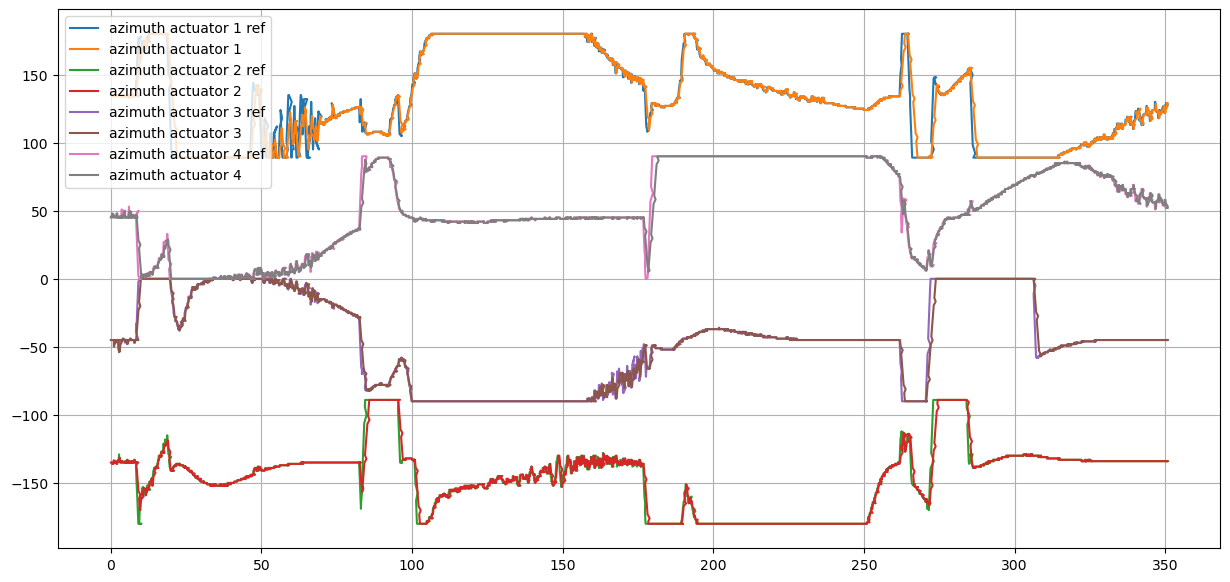

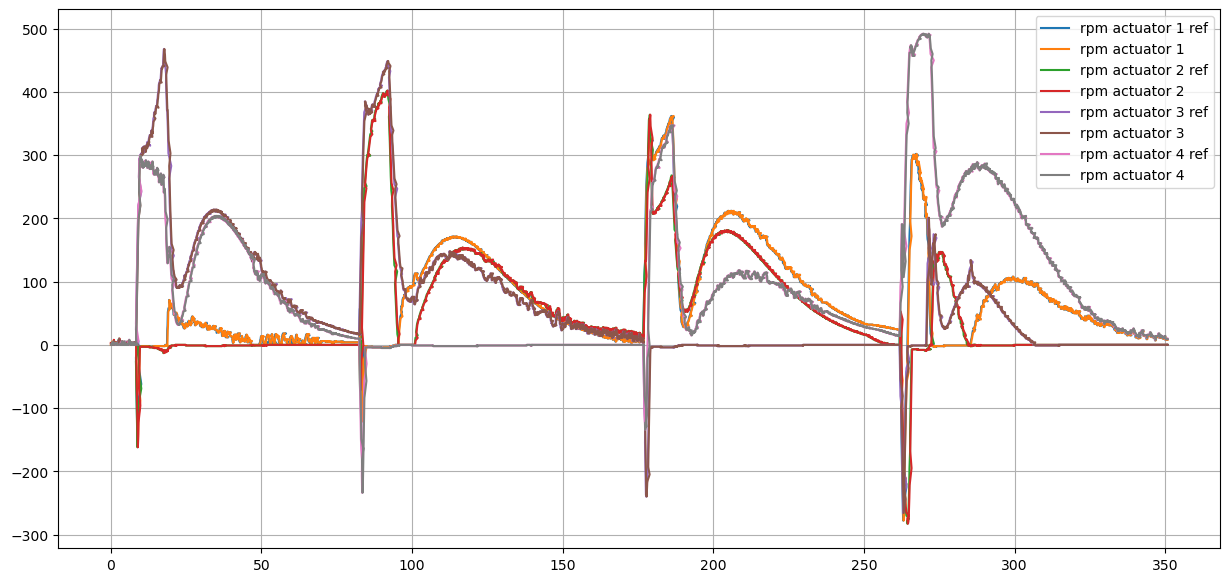

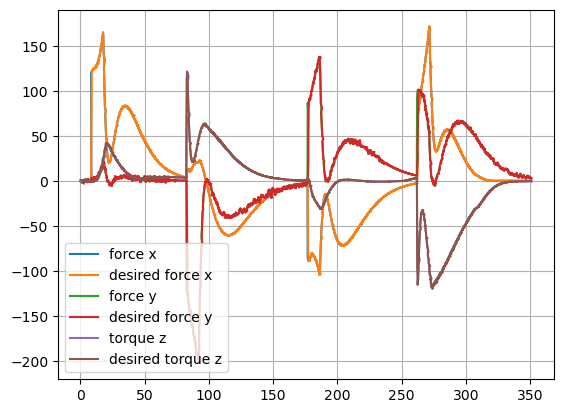

In [40]:
# Med w_angle = 10, w_neg = 50, max_rate = 1, max_force_rate = 50
base_name = "nlp1"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

# tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

# plt.figure()
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
# plt.legend()
# plt.grid()
# plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

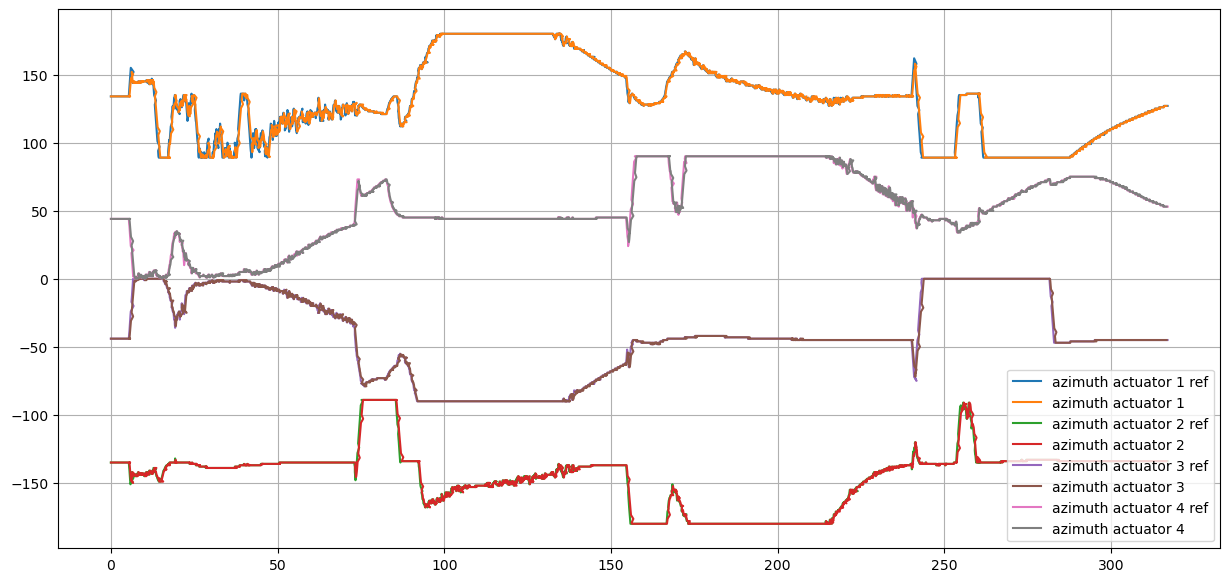

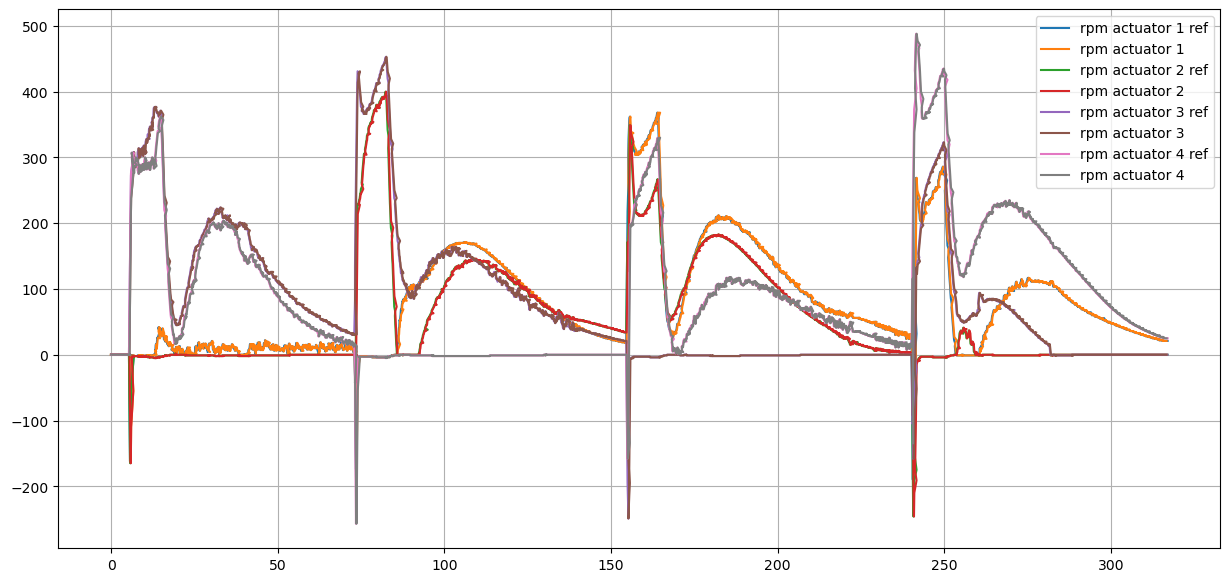

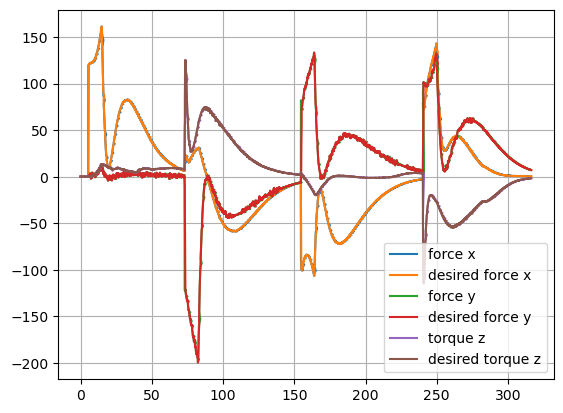

In [41]:
# Med w_angle = 50, w_neg = 50, max_rate = 0.6, max_force_rate = 100
base_name = "nlp2"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

# tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

# plt.figure()
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
# plt.legend()
# plt.grid()
# plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

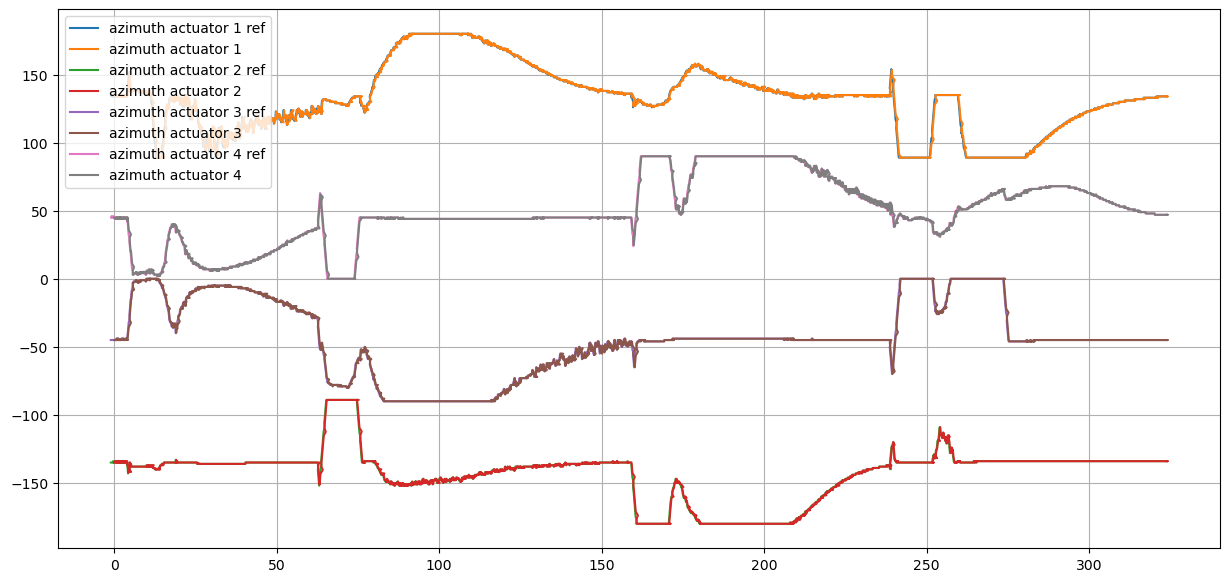

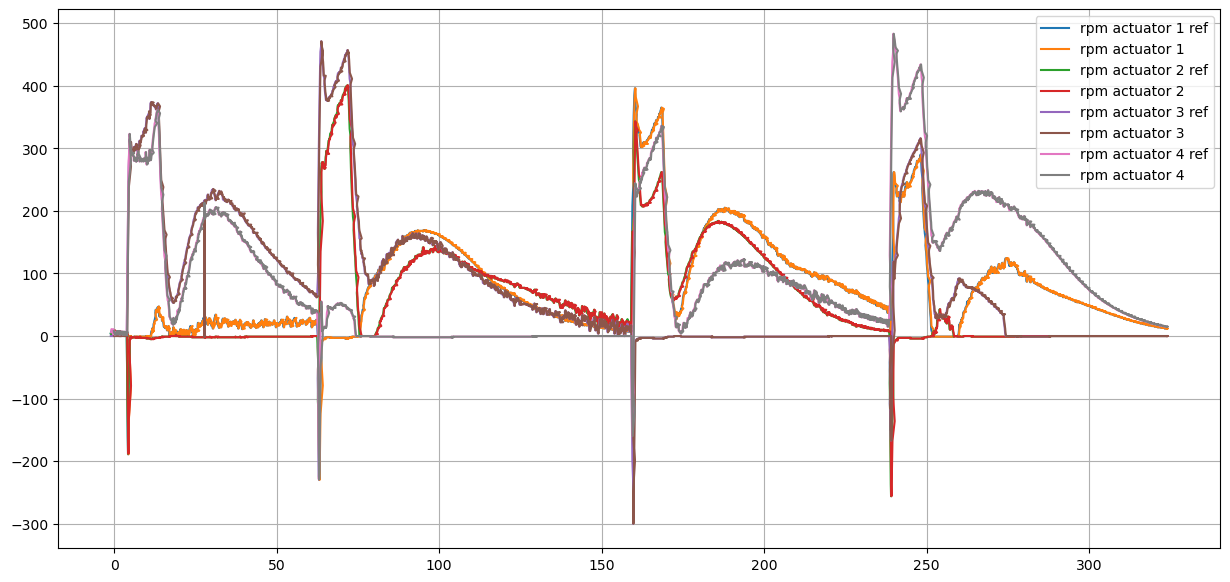

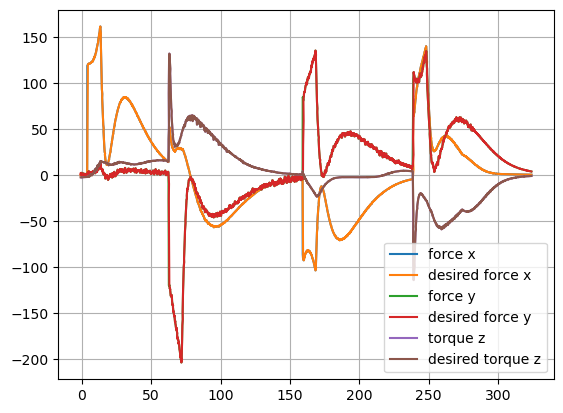

In [42]:
# Med w_angle = 150, w_neg = 50, max_rate = 0.5, max_force_rate = 100
base_name = "nlp3"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

# tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

# plt.figure()
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
# plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
# plt.legend()
# plt.grid()
# plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

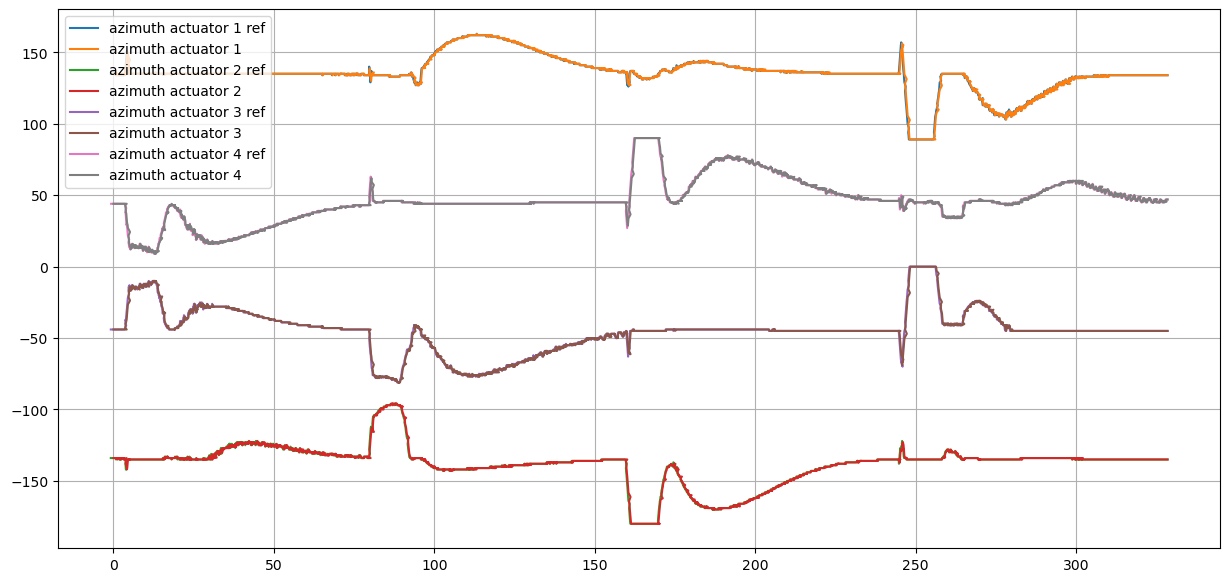

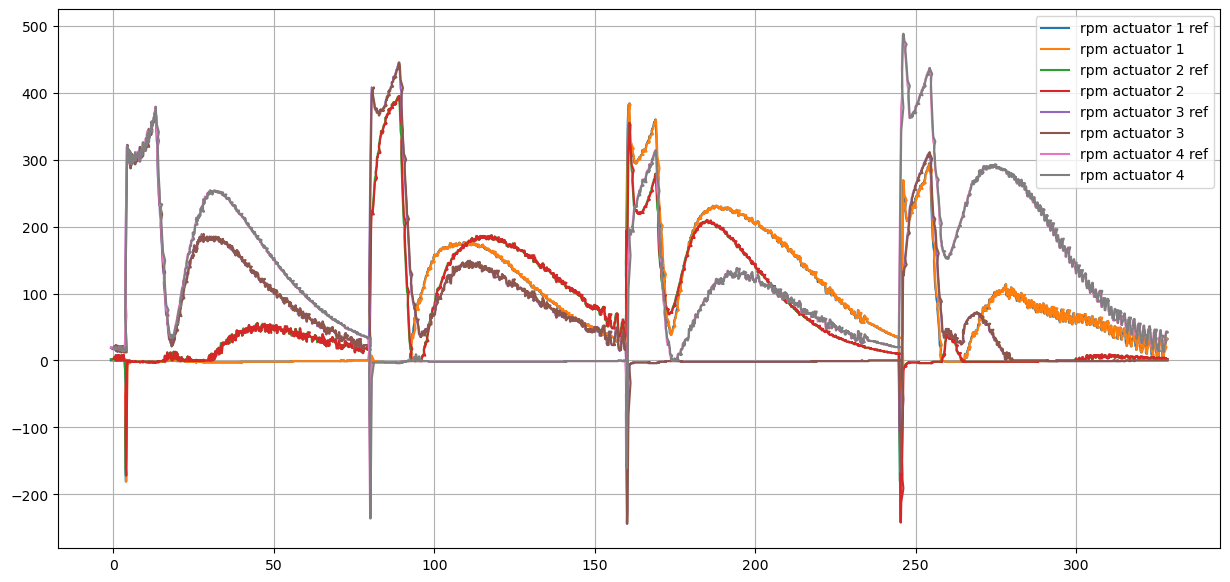

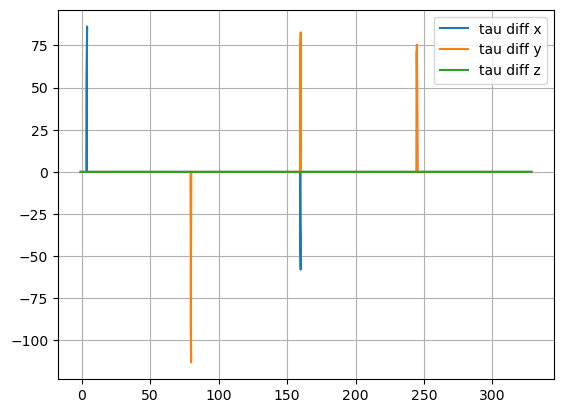

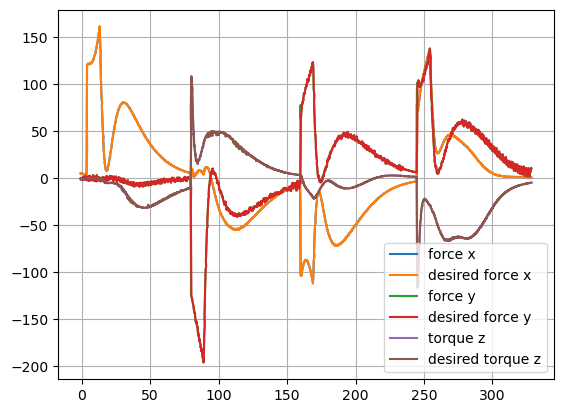

In [43]:
# Med w_angle = 1000, w_neg = 50, max_rate = 0.5, max_force_rate = 100
base_name = "nlp4"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure()
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# QP

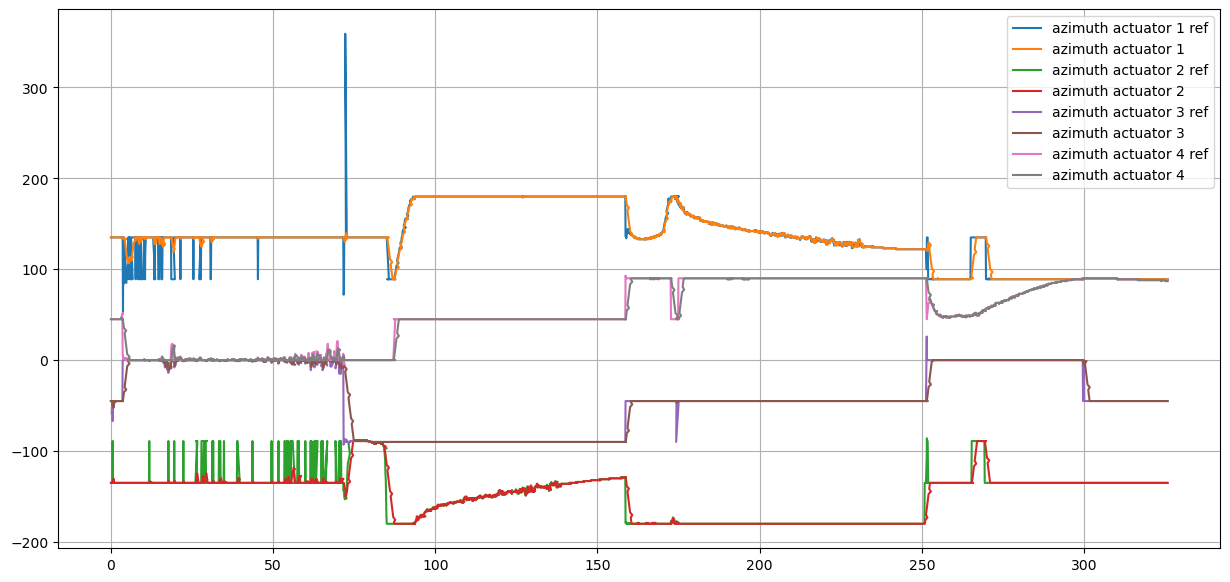

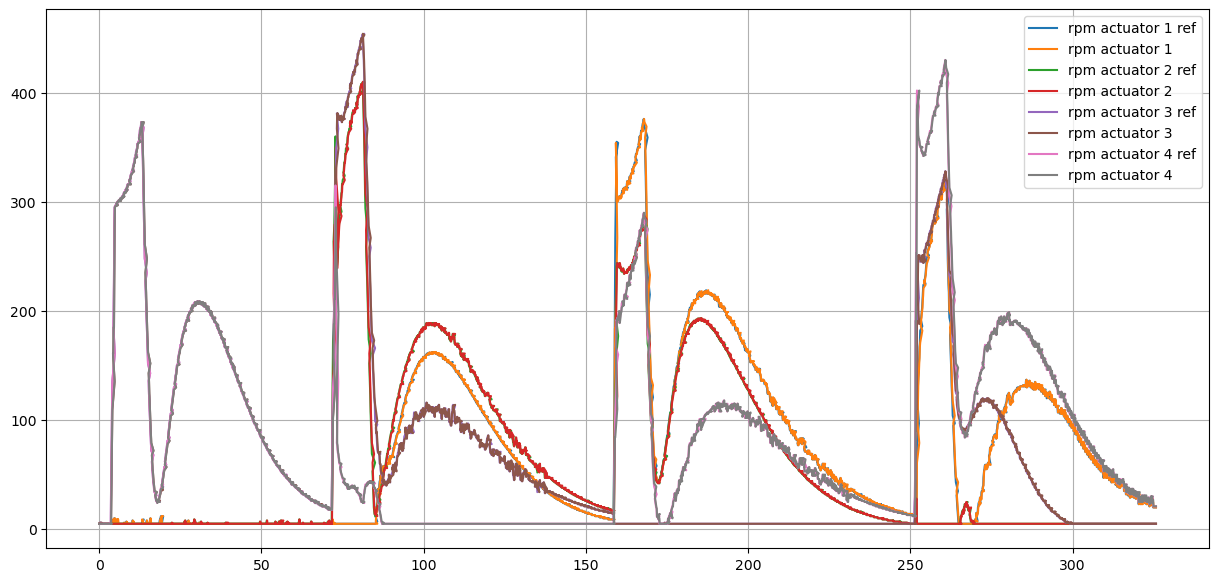

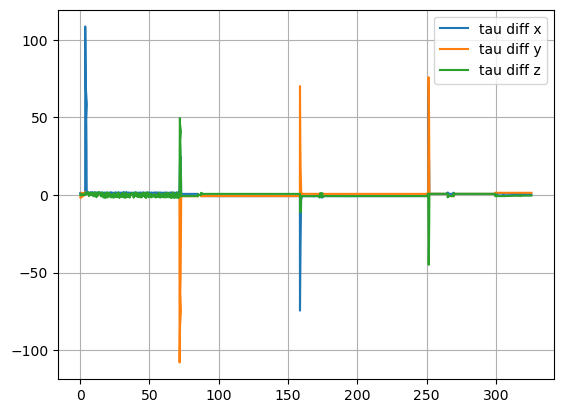

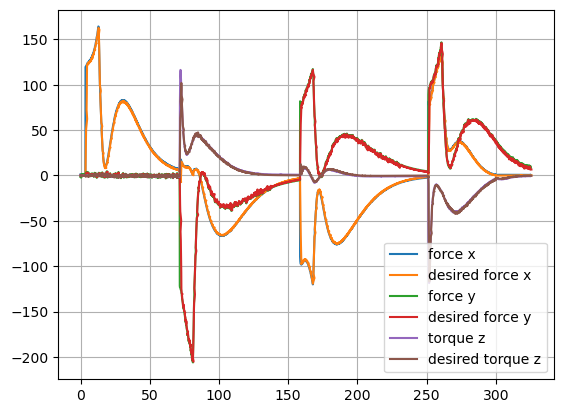

In [49]:
# Med max_rate = 1.0, max_force_rate = 50, W = 1, Q = 1000, beta = 1.1
base_name = "qp1"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure()
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# Maneuvering

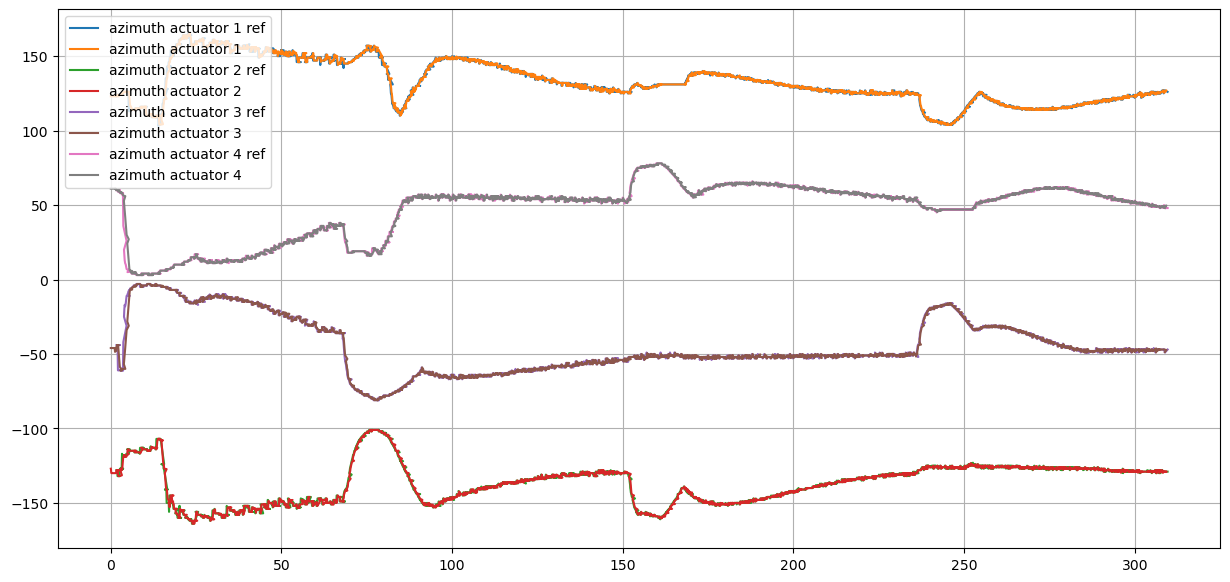

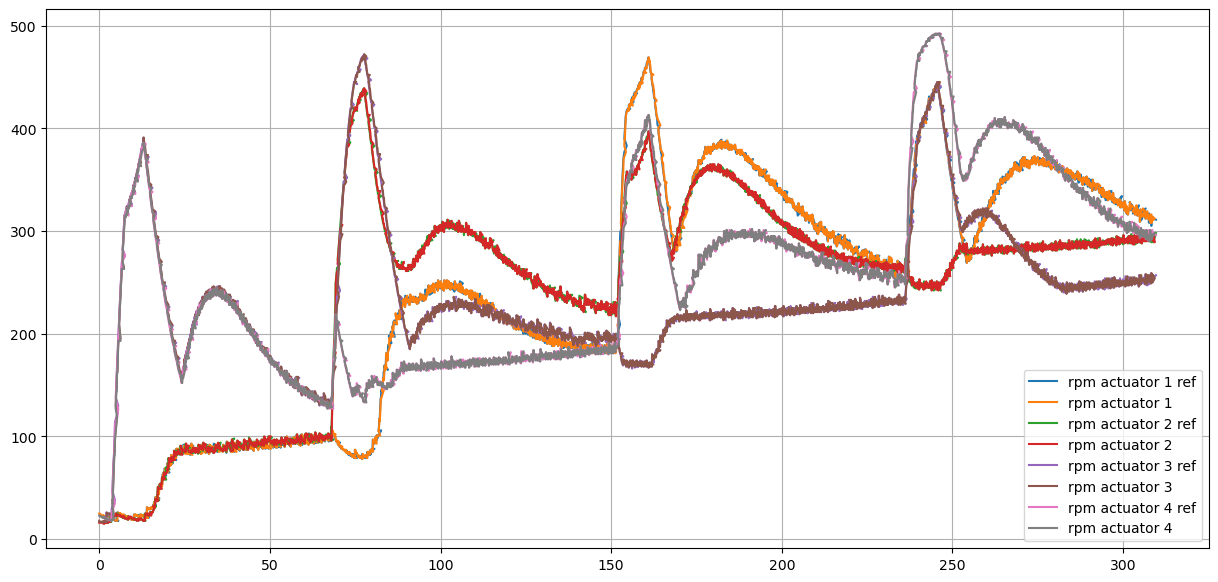

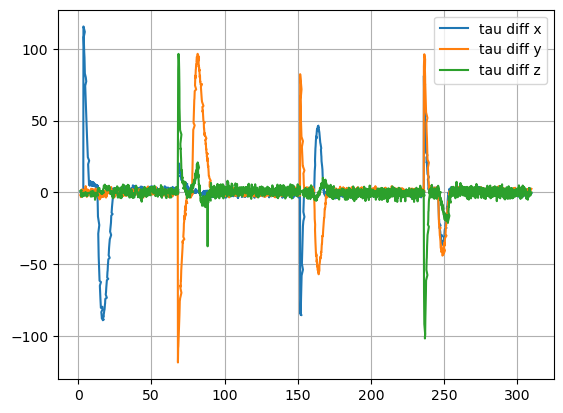

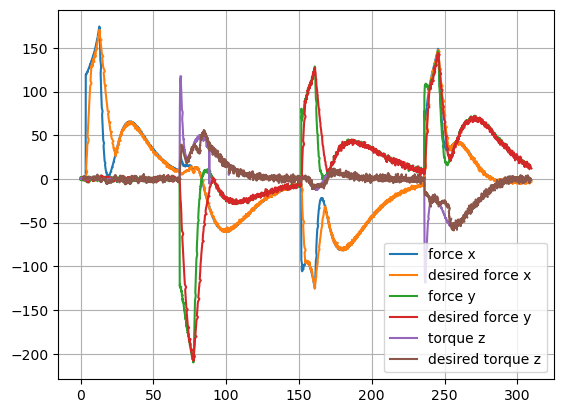

In [50]:
# Med mu = 0.1, gamma = 0.2, w = 1, rho = 0.1, zeta = 0.1, c = 1, lambda = 0.99
base_name = "maneuvering1"
data_path = f"{base_name}/{base_name}"
actuator_numbers = range(1, 5)

azimuth_data = {}
azimuth_time = {}
motor_speed_data = {}
motor_speed_time = {}
actuator_ref_data = {}
actuator_ref_time = {}

az_data, az_time, base_time = load_azimuth_data(1, data_path)
rpm_data, rpm_time, _ = load_rpm_data(1, data_path, base_time)
azimuth_data[1] = az_data
azimuth_time[1] = az_time
motor_speed_data[1] = rpm_data
motor_speed_time[1] = rpm_time

for i in actuator_numbers:
    if i != 1:
        az_data, az_time, _ = load_azimuth_data(i, data_path, base_time)
        azimuth_data[i] = az_data
        azimuth_time[i] = az_time
        rpm_data, rpm_time, _ = load_rpm_data(i, data_path, base_time)
        motor_speed_data[i] = rpm_data
        motor_speed_time[i] = rpm_time
    ref_data, ref_time = load_actuator_ref(i, data_path, base_time)
    actuator_ref_data[i] = ref_data
    actuator_ref_time[i] = ref_time

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['angle_reference'].to_numpy(), label=f'azimuth actuator {i} ref')
    plt.plot(azimuth_time[i].to_numpy(), azimuth_data[i]['data'].to_numpy(), label=f'azimuth actuator {i}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
for i in actuator_numbers:
    plt.plot(actuator_ref_time[i].to_numpy(), actuator_ref_data[i]['throttle_reference'].to_numpy(), label=f'rpm actuator {i} ref')
    plt.plot(motor_speed_time[i].to_numpy(), motor_speed_data[i]['motor_speed'].to_numpy(), label=f'rpm actuator {i}')
plt.legend()
plt.grid()
plt.show()

tau_diff_data, tau_diff_time, base_time = load_tau_diff_data(data_path, base_time)

plt.figure()
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_x'].to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_force_y'].to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_data['wrench_torque_z'].to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

control_action_data, control_action_time, base_time = load_control_action_data(data_path, base_time)
desired_control_action_data, desired_control_action_time, _ = load_desired_control_action_data(data_path, base_time)

plt.figure()
plt.plot(control_action_time.to_numpy(), control_action_data['force_x'].to_numpy(), label='force x')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_x'].to_numpy(), label='desired force x')
plt.plot(control_action_time.to_numpy(), control_action_data['force_y'].to_numpy(), label='force y')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_force_y'].to_numpy(), label='desired force y')
plt.plot(control_action_time.to_numpy(), control_action_data['torque_z'].to_numpy(), label='torque z')
plt.plot(desired_control_action_time.to_numpy(), desired_control_action_data['wrench_torque_z'].to_numpy(), label='desired torque z')
plt.legend()
plt.grid()
plt.show()

# Performance metrics

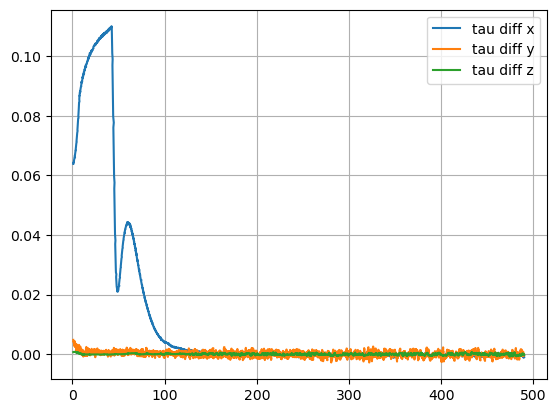

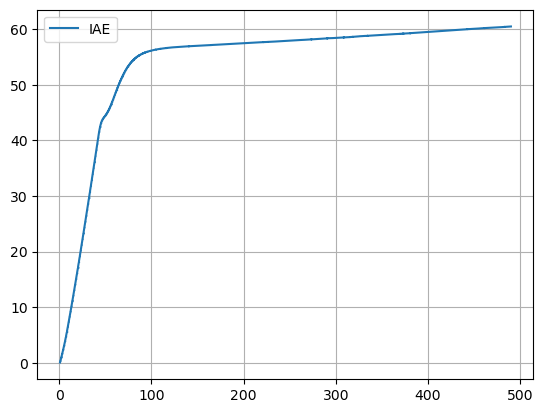

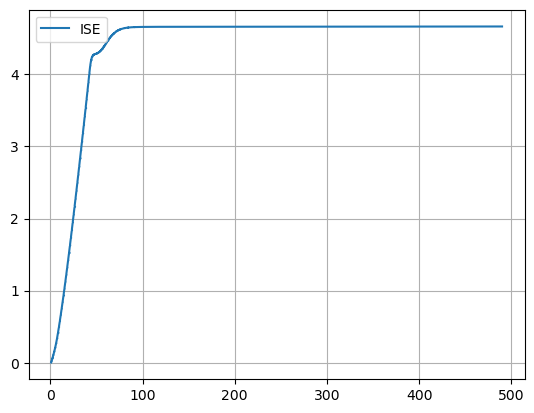

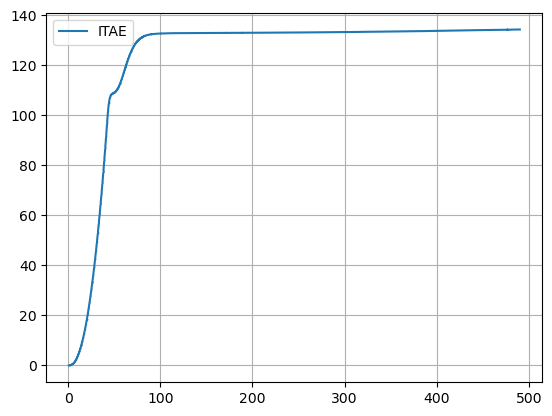

In [13]:
tau_diff = pd.read_csv('qp_test2/qp-test/tau_diff.csv')
tau_diff_time = pd.to_datetime(tau_diff['time'])
tau_diff_time = (tau_diff_time - base_time).dt.total_seconds()
tau_diff_x = tau_diff['wrench_force_x']
tau_diff_y = tau_diff['wrench_force_y']
tau_diff_z = tau_diff['wrench_torque_z']

plt.figure()
plt.plot(tau_diff_time.to_numpy(), tau_diff_x.to_numpy(), label='tau diff x')
plt.plot(tau_diff_time.to_numpy(), tau_diff_y.to_numpy(), label='tau diff y')
plt.plot(tau_diff_time.to_numpy(), tau_diff_z.to_numpy(), label='tau diff z')
plt.legend()
plt.grid()
plt.show()

IAE = np.zeros(len(tau_diff_time))
iae_sum = 0
for i in range(len(tau_diff_time)):
    iae_sum += np.sqrt(tau_diff_x[i]**2 + tau_diff_y[i]**2 + tau_diff_z[i]**2)
    IAE[i] = iae_sum
plt.figure()
plt.plot(tau_diff_time.to_numpy(), IAE, label='IAE')
plt.legend()
plt.grid()
plt.show()

ISE = np.zeros(len(tau_diff_time))
ise_sum = 0
for i in range(len(tau_diff_time)):
    ise_sum += (tau_diff_x[i]**2 + tau_diff_y[i]**2 + tau_diff_z[i]**2)
    ISE[i] = ise_sum
plt.figure()
plt.plot(tau_diff_time.to_numpy(), ISE, label='ISE')
plt.legend()
plt.grid()
plt.show()

ITAE = np.zeros(len(tau_diff_time))
itae_sum = 0
for i in range(len(tau_diff_time)):
    itae_sum += (tau_diff_x[i]**2 + tau_diff_y[i]**2 + tau_diff_z[i]**2) * tau_diff_time[i]
    ITAE[i] = itae_sum
plt.figure()
plt.plot(tau_diff_time.to_numpy(), ITAE, label='ITAE')
plt.legend()
plt.grid()
plt.show()